<b>Author:</b> Tiago de Almeida Silva<br>
<b>Course:</b> Statistics for Data Science with Python<br>
<b>Institution:</b> IBM

<h1>Project Case Scenario</h1>

<p>You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.</p>


In [168]:
import scipy.stats
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [169]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [6]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [7]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [9]:
boston_df.describe(include = "all")

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# <h1>Task 1</h1>

<b>1.1 For the "Median value of owner-occupied homes" provide a boxplot</b>

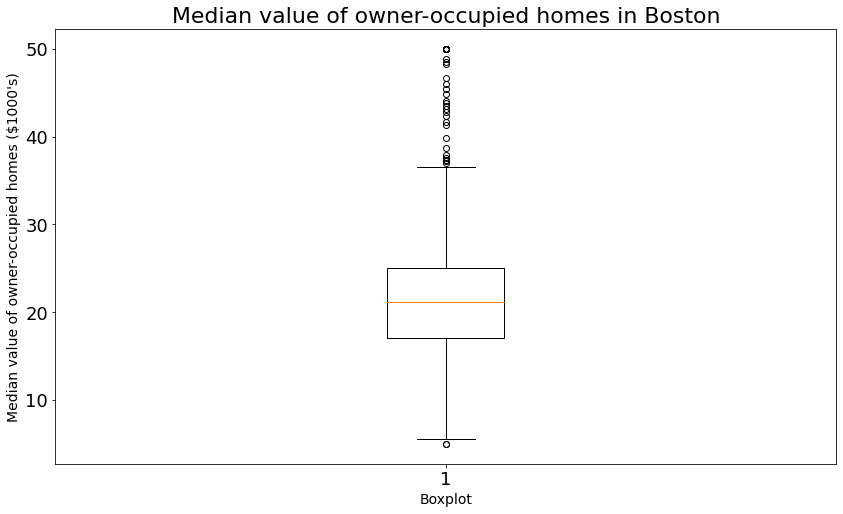

In [170]:
%matplotlib inline

plt.figure(figsize = (14, 8))
plt.boxplot("MEDV", data = boston_df)
plt.xlabel("Boxplot", fontsize = 14) 
plt.ylabel("Median value of owner-occupied homes ($1000's)", fontsize = 14)
plt.title("Median value of owner-occupied homes in Boston", fontsize = 22)


plt.show()

<b> 1.2 Provide a histogram for the Charles river variable</b>

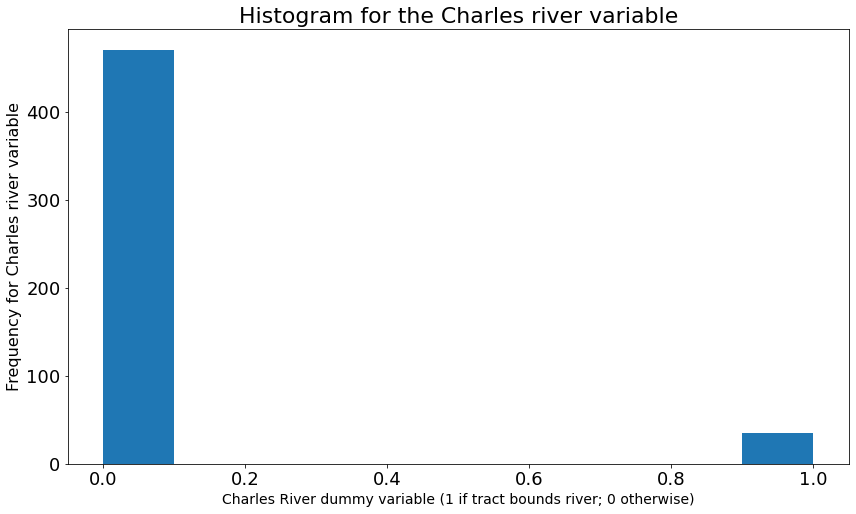

In [189]:
%matplotlib inline

plt.figure(figsize = (14,8))
plt.hist("CHAS", data = boston_df)
plt.title("Histogram for the Charles river variable", fontsize = 22)
plt.xlabel("Charles River dummy variable (1 if tract bounds river; 0 otherwise)", fontsize = 14) 
plt.ylabel("Frequency for Charles river variable", fontsize = 16)

plt.show()


<b> 1.3 Provide a boxplot for the MEDV variable vs the AGE variable. 
(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)</b>

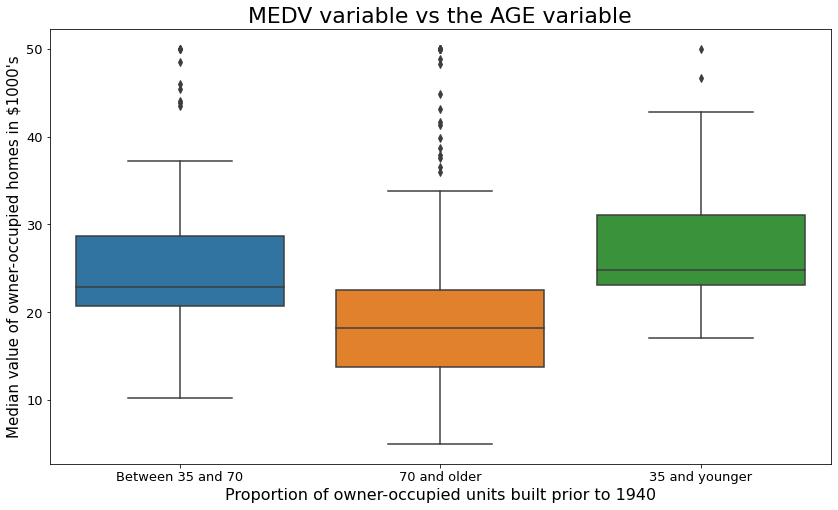

In [172]:
boston_df.loc[boston_df['AGE'] <= 30, 'Age_Group'] = "35 and younger"
boston_df.loc[(boston_df['AGE'] > 30) & (boston_df['AGE'] < 70), 'Age_Group'] = "Between 35 and 70"
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = "70 and older"

plt.figure(figsize=(14, 8))
box = sns.boxplot(x = 'Age_Group', y = 'MEDV', data = boston_df)
box.set_title("MEDV variable vs the AGE variable", fontsize = 22)
box.set_xlabel("Proportion of owner-occupied units built prior to 1940", fontsize = 16)
box.set_ylabel("Median value of owner-occupied homes in $1000's", fontsize = 15)
box.tick_params(labelsize=13)

plt.show()       



<b>1.4 Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 
What can you say about the relationship?</b>

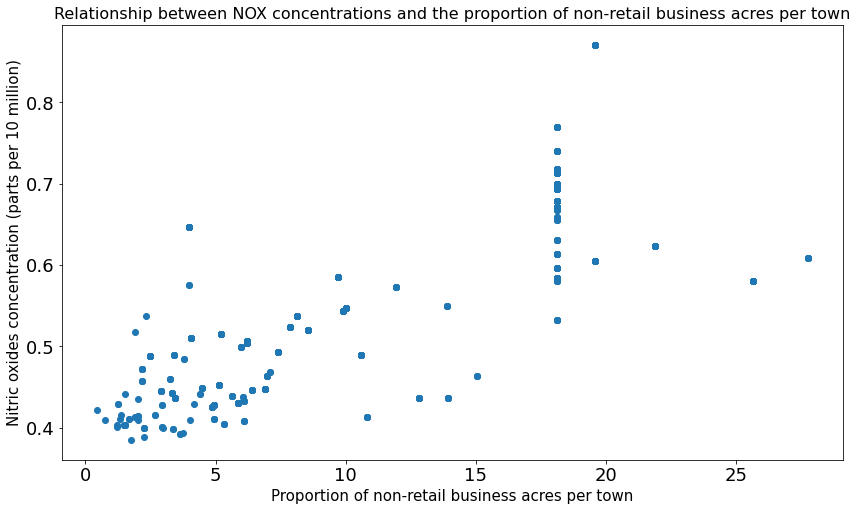

In [173]:
%matplotlib inline

plt.figure(figsize=(14,8))
plt.scatter(x = "INDUS", y = "NOX", data = boston_df)
plt.title("Relationship between NOX concentrations and the proportion of non-retail business acres per town", fontsize = 16)
plt.xlabel("Proportion of non-retail business acres per town", fontsize = 15)
plt.ylabel("Nitric oxides concentration (parts per 10 million)", fontsize = 15)


plt.show()

Answer: As we can see on the plot above there is a positive correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town as there is a linear relationship between both variables. I will add below a linear regression line to the plot to make it easier to see this positive correlation.

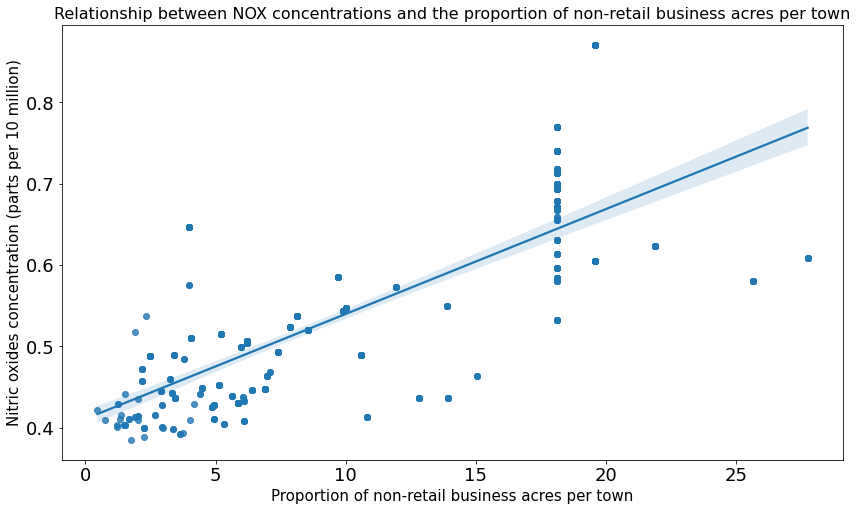

In [174]:
X = boston_df[['INDUS']]
Y = boston_df['NOX']

lm = LinearRegression()

lm.fit(X, Y)

predic = lm.predict(X)

plt.figure(figsize=(14,8))
plot = sns.regplot(x = "INDUS", y = "NOX", data = boston_df)
plot.set_title("Relationship between NOX concentrations and the proportion of non-retail business acres per town", fontsize = 16)
plot.set_xlabel("Proportion of non-retail business acres per town", fontsize = 15)
plot.set_ylabel("Nitric oxides concentration (parts per 10 million)", fontsize = 15)

plt.show()


<b>1.5 Create a histogram for the pupil to teacher ratio variable</b>

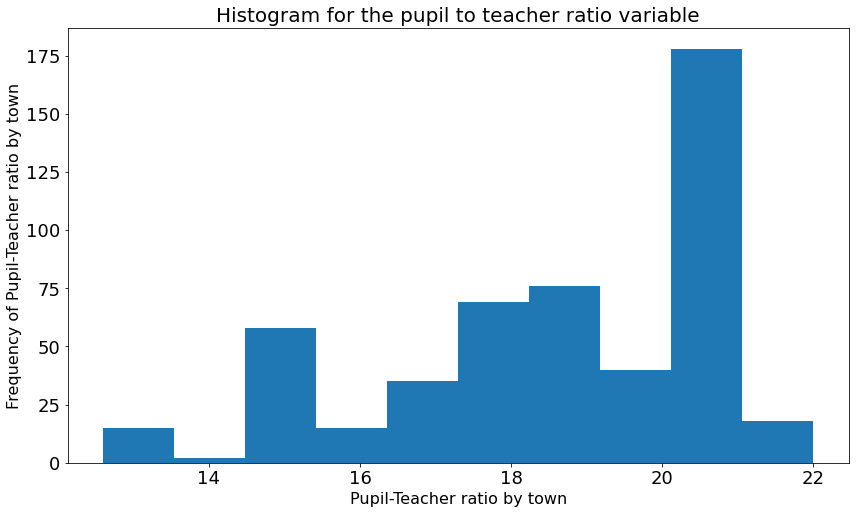

In [175]:
%matplotlib inline

plt.figure(figsize=(14,8))
plt.hist("PTRATIO", data=boston_df)
plt.title("Histogram for the pupil to teacher ratio variable", fontsize = 20)
plt.xlabel("Pupil-Teacher ratio by town", fontsize = 16)
plt.ylabel("Frequency of Pupil-Teacher ratio by town", fontsize = 16)

plt.show()

<h1>Task 2</h1>

<ul>
<li>State your hypothesis.</li>

<li>Use α = 0.05</li>

<li>Perform the test Statistics.</li>

<li>State the conclusion from the test.</li>
</ul>

<b> 2.1 Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)</b>

My hypothesis:
<ul>
<li>H0:µ1=µ2  ("there is no difference in median value of houses bounded by the Charles river")</li>
<li>H1:µ1≠µ2 ("there is a difference in median value of houses bounded by the Charles river")</li>
</ul>



In [176]:
scipy.stats.ttest_ind(boston_df['MEDV'], boston_df['CHAS'])

Ttest_indResult(statistic=54.9210289745203, pvalue=1.4651540072350996e-305)

Answer: The null hypothesis is rejected because the p-value is less than the alpha value of 0.05 and that means there is a statistical difference in median value between both variables.

<b>2.2 Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)</b>

My hypothesis:
<ul>
<li>H0: µ1=µ2=µ3  (all means are equal)</li>
<li>H1:  At least one mean is different</li>
</ul>




In [177]:
first = boston_df[boston_df['Age_Group'] == "35 and younger"]['MEDV']
second = boston_df[boston_df['Age_Group'] == "Between 35 and 70"]['MEDV']
third = boston_df[boston_df['Age_Group'] == "70 and older"]['MEDV']

scipy.stats.f_oneway(first, second, third)

F_onewayResult(statistic=34.249179272635395, pvalue=1.135217093487225e-14)

Answer: The null hypothesis is rejected because the p-value is less than the alpha value of 0.05 and that means there is a statistical difference in Median values of houses for each proportion of owner-occupied units built before 1940. We can see it clearly in the plot below.

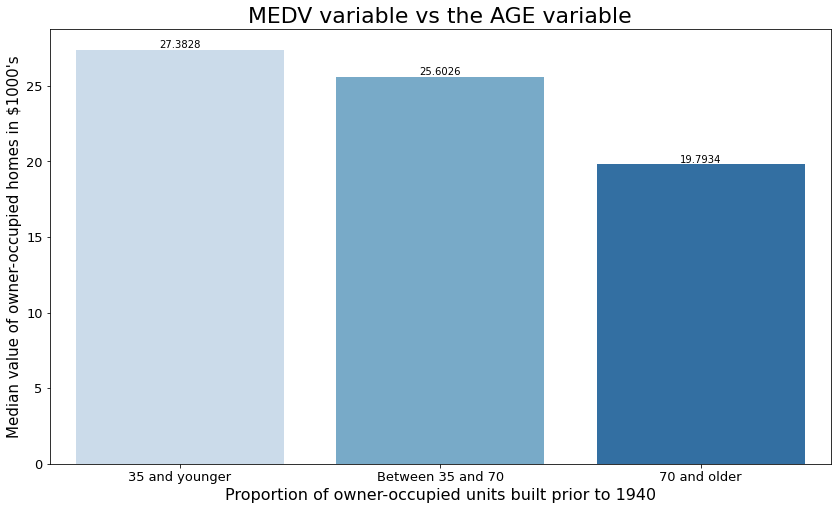

In [178]:
order_list = ["35 and younger", "Between 35 and 70", "70 and older"]

plt.figure(figsize=(14, 8))
b = sns.barplot(x = "Age_Group", y = 'MEDV', data=boston_df, palette="Blues", ci=None, order=order_list)
b.set_title("MEDV variable vs the AGE variable", fontsize = 22)
b.set_xlabel("Proportion of owner-occupied units built prior to 1940", fontsize = 16)
b.set_ylabel("Median value of owner-occupied homes in $1000's", fontsize = 15)
b.tick_params(labelsize=13)
b.bar_label(b.containers[0])


plt.show()   


<b>2.3 Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)</b>

My hypothesis:
<ul>
<li>H0:  There is no relationship between NOX concentrations and proportion of non-retail business acres per town.</li>
<li>H1:  There is a relationship between NOX concentrations and proportion of non-retail business acres per town.</li>
</ul>



In [179]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

(0.7636514469209151, 7.913361061238693e-98)

Answer: The null hypothesis is rejected because the p-value is less than the alpha value of 0.05 and that means there is a statistical relationship between NOX concentrations and proportion of non-retail business acres per town.

<b>2.4 What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)</b>

My hypothesis:
<ul>
<li>H0:β1  = 0 (No impact between both variables)</li>
<li>H1:β1 ≠ 0 (There is an impact netween both variables)</li>
</ul>


In [180]:
axis_x = boston_df['DIS']
axis_y = boston_df['MEDV']

axis_x = sm.add_constant(axis_x) 

finds = sm.OLS(axis_y, axis_x).fit()
pred = finds.predict(axis_x)

finds.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 03 Mar 2022   Prob (F-statistic):           1.21e-08
Time:                        20:57:17   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Answer: The null hypothesis is rejected because the p-value is less than the alpha value of 0.05 and that means there is a positive impact (coeficient of 1.0916) of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.